**TEORIAS DE LA CAPACIDAD PORTANTE**

In [17]:
from sympy import *

In [18]:
B=Symbol('B')
q_max=2*c*pi
Ma=q_max*2*B**2
Mr=4*pi*c*B**2

NameError: name 'c' is not defined

**ECUACIONES DE CAPACIDAD DE CARGA**

*TERZAGHI*

In [ ]:
# Cimentacion Corrida
Nc=27.09
Nq=14.21
Ny=9.84
gamma=19
c=10
FS=3
Df=1.5
B=2
q=Df*gamma
q_u=c*Nc+q*Nq+1/2*gamma*B*Ny # The most important equation
q_a=q_u/FS
q_a

287.615

In [ ]:
# Cimentacion Cuadrada
from sympy import *
Nc=23.36
Nq=11.4
Ny=7.08
Df=1
c=15
gamma=18.5
q=gamma*Df
B=Symbol('B')
q_u = 1.3*c*Nc+q*Nq+0.4*gamma*B*Ny  # The most important equation
q_u

52.392*B + 666.42

In [ ]:
# Cimentacion Circular
from sympy import *
Nc = 23.36
Nq = 11.4
Ny = 7.08
Df = 1
c = 15
gamma = 18.5
q = gamma*Df
B = Symbol('B')
q_u = 1.3*c*Nc+q*Nq+0.3*gamma*B*Ny  # The most important equation
q_u

39.294*B + 666.42

*ECUACION GENERAL DE LA CAPACIDAD DE CARGA*

$$q_u=c*Nc*Fcs*Fcd*Fci+q*Nq*Fqs*Fqd*Fqi+\frac{1}{2}*\gamma*B*N_{\gamma}*F_{\gamma s}*F_{\gamma d}*F_{\gamma i}$$

In [1]:
from sympy import *
phi = 33  # Angulo de friccion interna Sexagesimal

Nq = tan((45+phi/2)*pi/180)**2*exp(pi*tan(phi*pi/180))
Nc = (Nq-1)*cot(phi*pi/180)
Ny = 2*(Nq+1)*tan(phi*pi/180)
print ('Nq='+str(round(Nq, 2)), 'Nc='+str(round(Nc, 2)),'Ny='+str(round(Ny,2)))

Nq=26.09 Nc=38.64 Ny=35.19


*Effective area for case II where:*
$$0.17<e_L/L<0.5$$
$$e_B<B<0.17$$

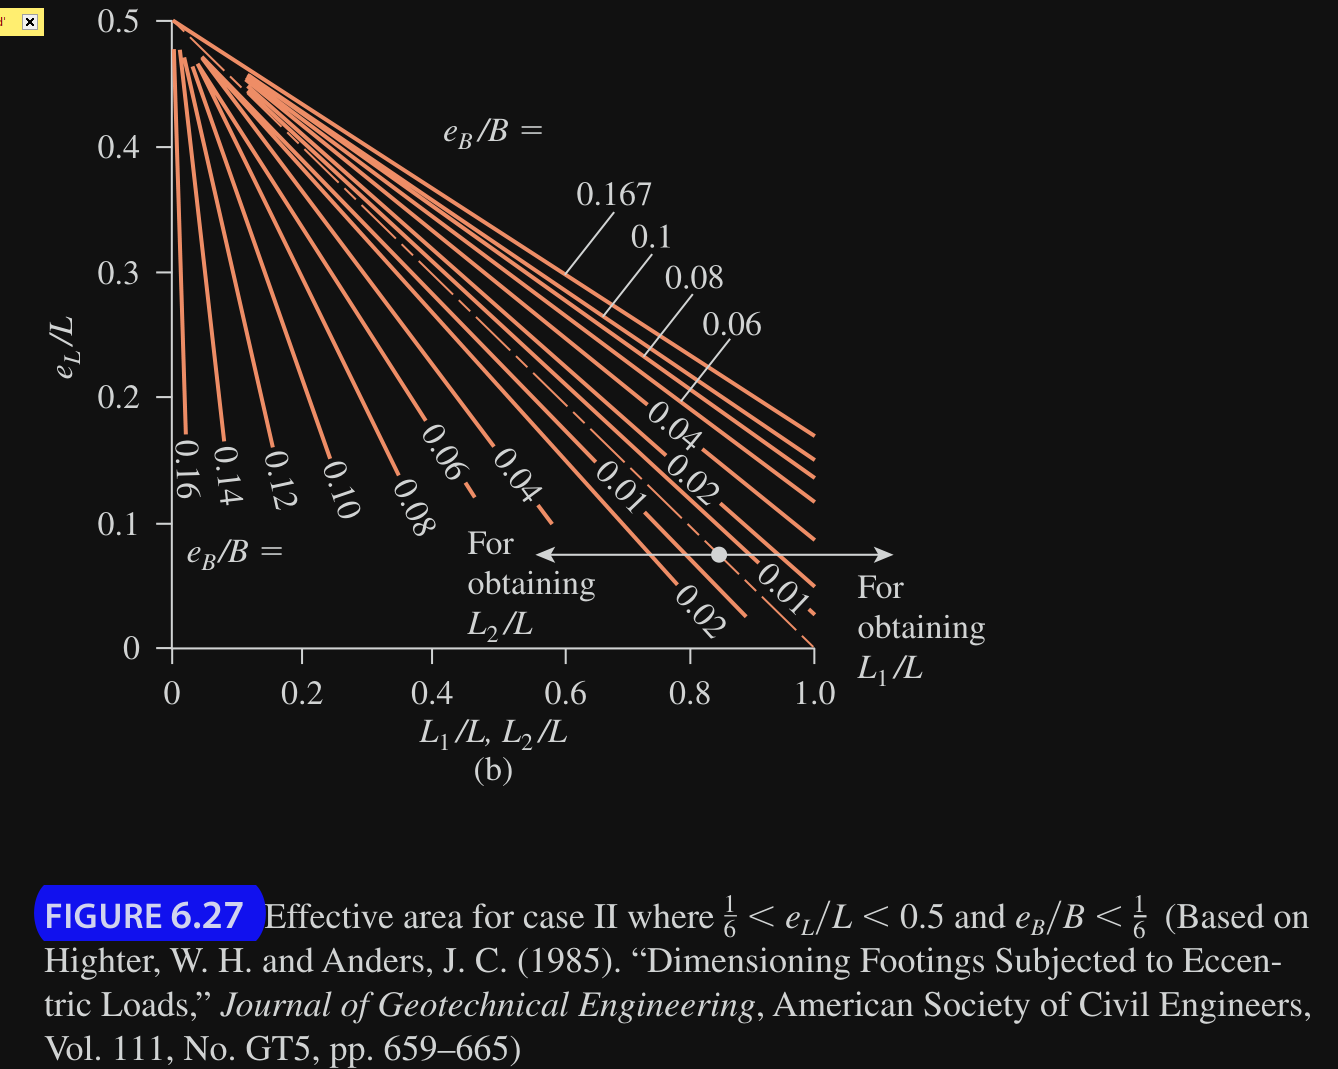

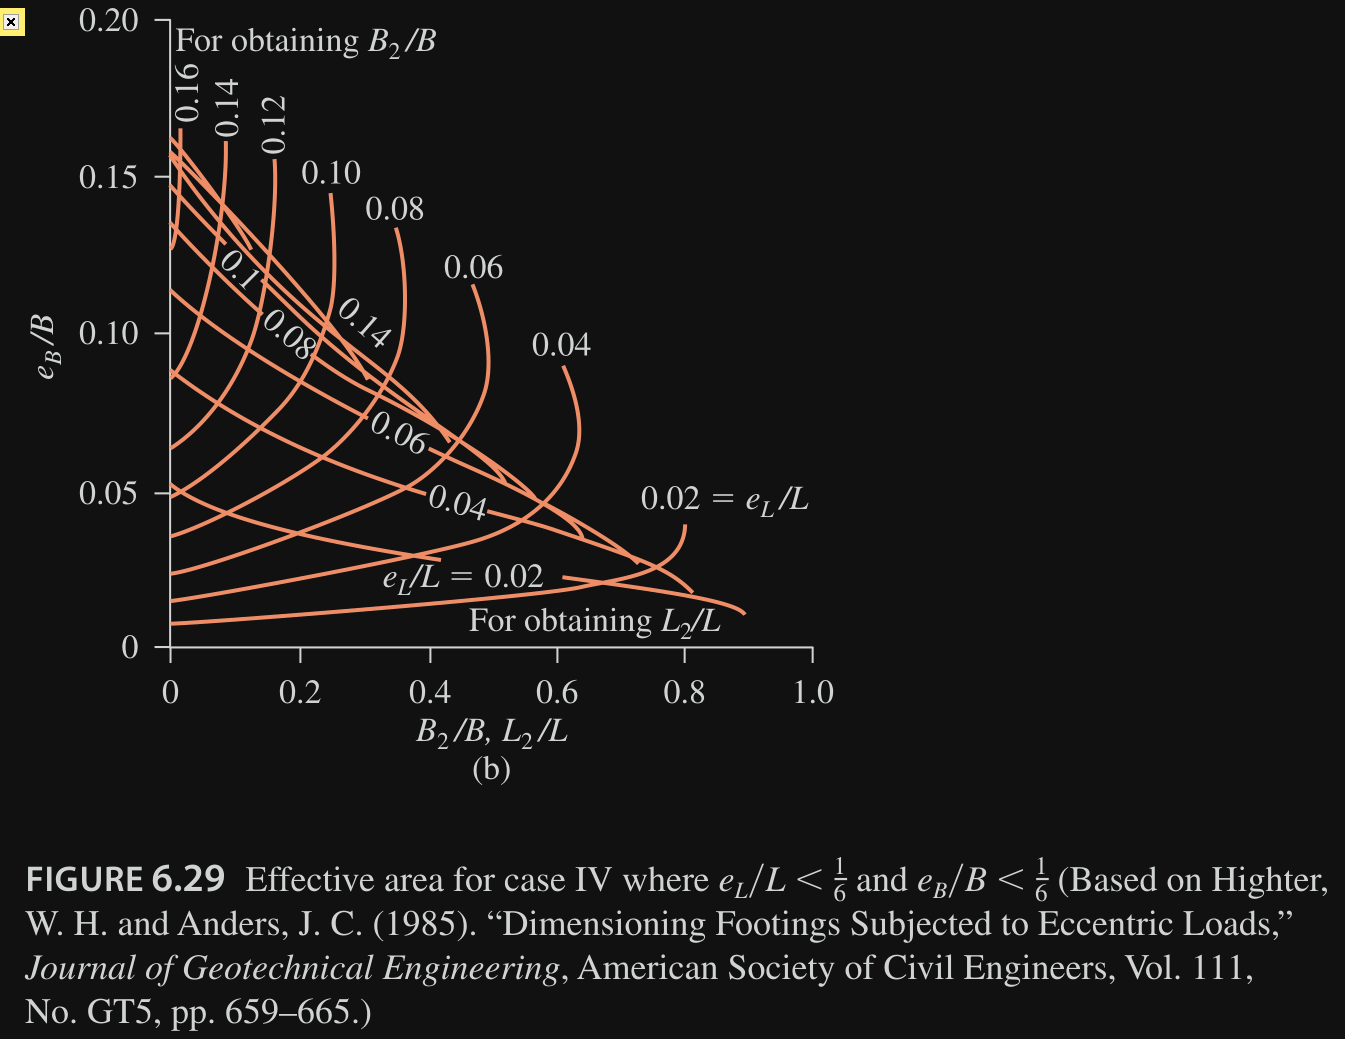

In [7]:
# Excentricidades

extr_1 = False  # En un Sentido :: OK
extr_2 = False  # En dos Sentidos
extr_2_sa = True # Enfoque mas Simple en dos Sentidos Excentricidades

B = 1.58
L = zoo # Infinito para Cimentacion Continua (zoo)

if extr_1:
    ex_x = 0.2
    B_ef = B-2*ex_x
    B=B_ef
    print('B_ef='+str(round(B_ef, 2)))

if extr_2:
    ex_x = 0.15 # Excentricidad X
    ex_y = 0.2  # Excentricidad Y
    print('ex_L/L='+str(round(ex_y/L, 3)))
    print('ex_B/B='+str(round(ex_x/B, 3)))
    f_c1 = 0.85  # Obtener de las Graficas
    f_c2 = 0.21  # Obtener de las Graficas
    L_1 = f_c1*L
    L_2 = f_c2*L
    A_ef = 1/2*(L_1+L_2)*B
    L_ef = L_1
    B_ef = A_ef/L_ef
    B=B_ef
    L=L_ef
    print ('L_ef='+str(round(L_ef, 2)),'B_ef='+str(round(B_ef,2)))
    
if extr_2_sa:
    ex_x=0.17
    ex_y=0
    B_ef = B-2*ex_x
    L_ef = L-2*ex_y
    B=B_ef
    L=L_ef
    A_ef=B*L
    print ('B_ef='+str(round(B_ef, 2)),'L_ef='+str(round(L_ef, 2)))

B_ef=1.24 L_ef=zoo


In [8]:
c = 0
gamma = 1600
Df = .8
FS = 3
beta = 0 # Angulo de inclinacion Sexagesimal
q = Df*gamma
print ('q='+str(round(q,2)))

# Napa Freatica

Case_1 = False  # 0<D1<Df
Case_2 = False  # 0<d<B

gamma_s = 18.5
gamma_w = 9.81  # 9.81 KN/m3 = Densidad del Agua :: 1000 Kg/m3

if Case_1:
    D1 = 0.61
    D2 = Df-D1
    gamma_ef = gamma_s-gamma_w
    q_ef = D1*gamma+D2*gamma_ef
    q=q_ef
    print('q_ef='+str(round(q_ef, 2)))
if Case_2:
    d = 1
    gamma_ef = gamma_s-gamma_w
    gamma_avg = gamma_ef+d/B*(gamma-gamma_ef)
    q_ef = Df*gamma_avg
    q=q_ef
    print('q_ef='+str(round(q_ef, 2)))

q=1280.0


In [ ]:
# Factores de Forma
Fcs=1+B/L*Nq/Nc
Fqs=1+B/L*tan(phi*pi/180)
Fys=1-0.4*B/L
print ('Fcs='+str(round(Fcs,2)), 'Fqs='+str(round(Fqs,2)), 'Fys='+str(round(Fys,2)))

B=1.58 # Longitud Original

# Factores de profundidad
if Df/B<1:
    if phi==0:
        Fcd=1+0.4*Df/B
        Fqd=1
        Fyd=1
        print ('Fcd='+str(round(Fcd,2)), 'Fqd='+str(round(Fqd,2)), 'Fyd='+str(round(Fyd,2)))
    elif phi>0:
        Fqd=1+2*tan(phi*pi/180)*(1-sin(phi*pi/180))**2*Df/B
        Fcd=Fqd-(1-Fqd)/(Nc*tan(phi*pi/180))
        Fyd=1
        print ('Fcd='+str(round(Fcd,2)), 'Fqd='+str(round(Fqd,2)), 'Fyd='+str(round(Fyd,2)))
    else:
        print('Error')
else:
    if phi==0:
        Fcd=1+0.4*atan(Df/B)
        Fqd=1
        Fyd=1
        print ('Fcd='+str(round(Fcd,2)), 'Fqd='+str(round(Fqd,2)), 'Fyd='+str(round(Fyd,2)))
    elif phi>0:
        Fqd=1+2*tan(phi*pi/180)*(1-sin(phi*pi/180))**2*atan(Df/B)
        Fcd=Fqd-(1-Fqd)/(Nc*tan(phi*pi/180))
        Fyd=1
        print ('Fcd='+str(round(Fcd,2)), 'Fqd='+str(round(Fqd,2)), 'Fyd='+str(round(Fyd,2)))
    else:
        print('Error')
        
# Factores de inclinacion
Fci=(1-beta/90)**2
Fqi=Fci
Fyi=(1-beta/phi)**2
print ('Fci='+str(round(Fci,2)), 'Fqi='+str(round(Fqi,2)), 'Fyi='+str(round(Fyi,2)))

Fcs=1 Fqs=1 Fys=1
Fcd=1.13 Fqd=1.13 Fyd=1
Fci=1.0 Fqi=1.0 Fyi=1.0


In [12]:
# Ultima capacidad de carga
Fcs=1
Fqs=1
Fys=1
Fci=1
Fqi=1
Fyi=1
phi=33
Df=.8
B=1.58
Nq=26.09
Nc=38.64
Ny=35.19

Fqd=1+2*tan(phi*pi/180)*(1-sin(phi*pi/180))**2*Df/B
Fcd=Fqd-(1-Fqd)/(Nc*tan(phi*pi/180))
Fyd=1

if extr_1:
    B=B_ef
if extr_2:
    B=B_ef
if extr_2_sa:
    B=B_ef
q_u = c*Nc*Fcs*Fcd*Fci+q*Nq*Fqs*Fqd*Fqi+0.5*gamma*B*Ny*Fys*Fyd*Fyi
print ('q_u='+str(round(q_u, 2)))
# Para calcular la carga ultima efectiva, se debe tomar en cuenta las medidas efectivas, asi sea la permitida.

q_u=72857.50


In [22]:
(q_u/2.5).evalf(5)

29143.

**SUELOS ESTRATIFICADOS**

*Suelo Fuerte sobre Debil*

*1. The top layer is strong sand and the weaker bottom layer is saturated soft clay $\phi=0$. From Eqs. (7.22), (7.23), and (7.24),*

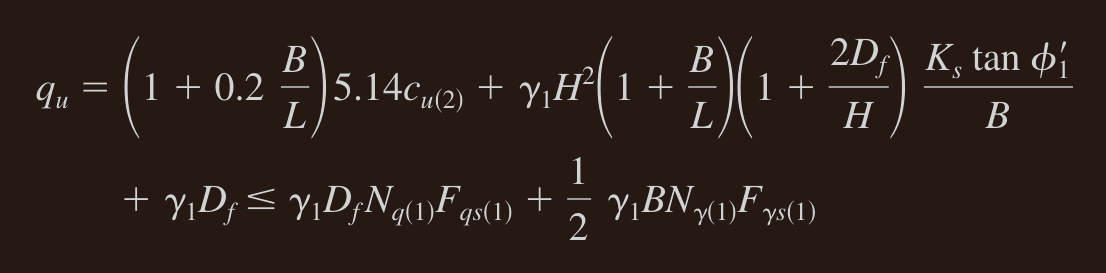

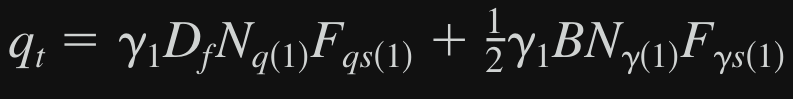

*2. The top layer is stronger sand and the bottom layer is weaker sand $c_1'=0,c_2'=0$. The ultimate bearing capacity can be given as*

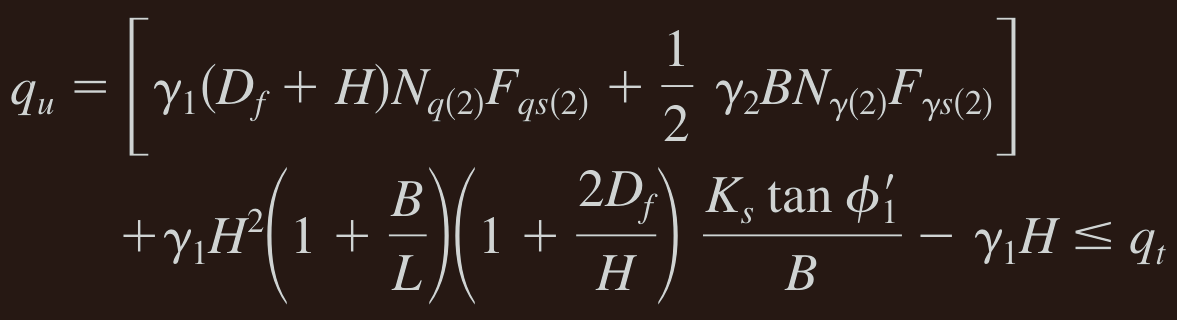

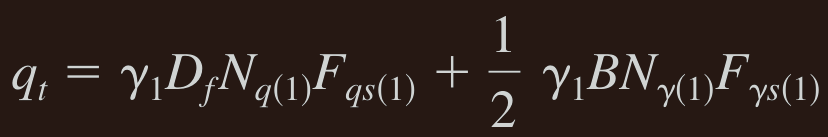

*3. The top layer is stronger saturated clay $\phi_1=0$ and the bottom layer is weaker saturated clay $\phi_2=0$. The ultimate bearing capacity can be given as*

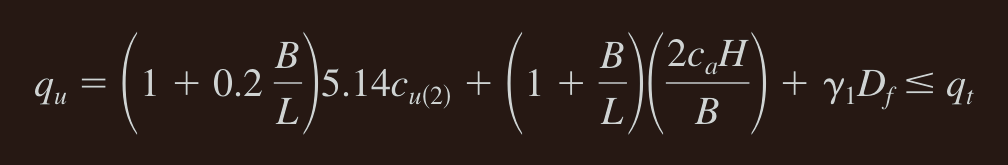

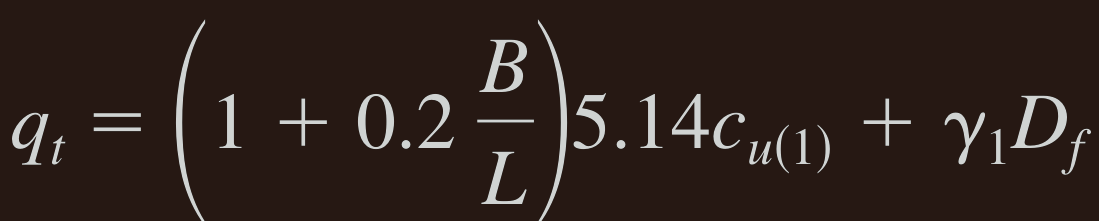

In [54]:
from sympy import *
phi = 0  # Angulo de friccion interna Sexagesimal

Nq = tan((45+phi/2)*pi/180)**2*exp(pi*tan(phi*pi/180))
Nc = (Nq-1)*cot(phi*pi/180)
Ny = 2*(Nq+1)*tan(phi*pi/180)
print ('Nq='+str(round(Nq, 2)), 'Nc='+str(round(Nc, 2)), 'Ny='+str(round(Ny,2)))

Nq=1 Nc=nan Ny=0


In [30]:
Nq_1=64.2
Nc_1=75.31
Ny_1=109.41

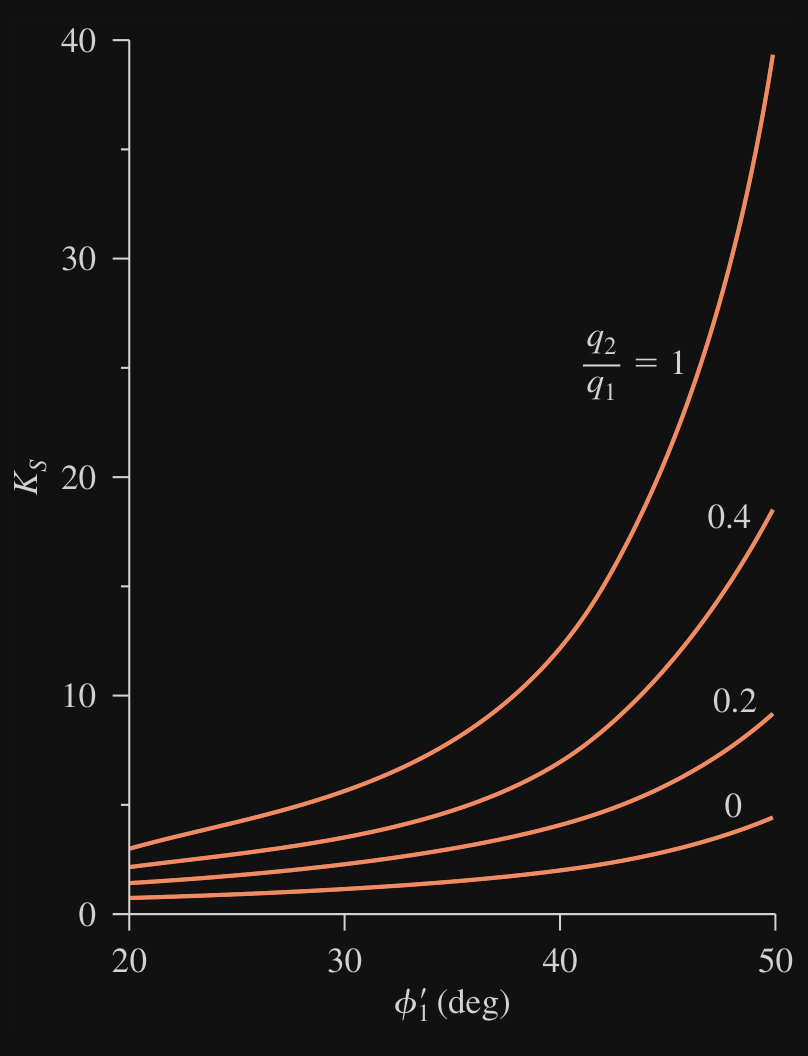

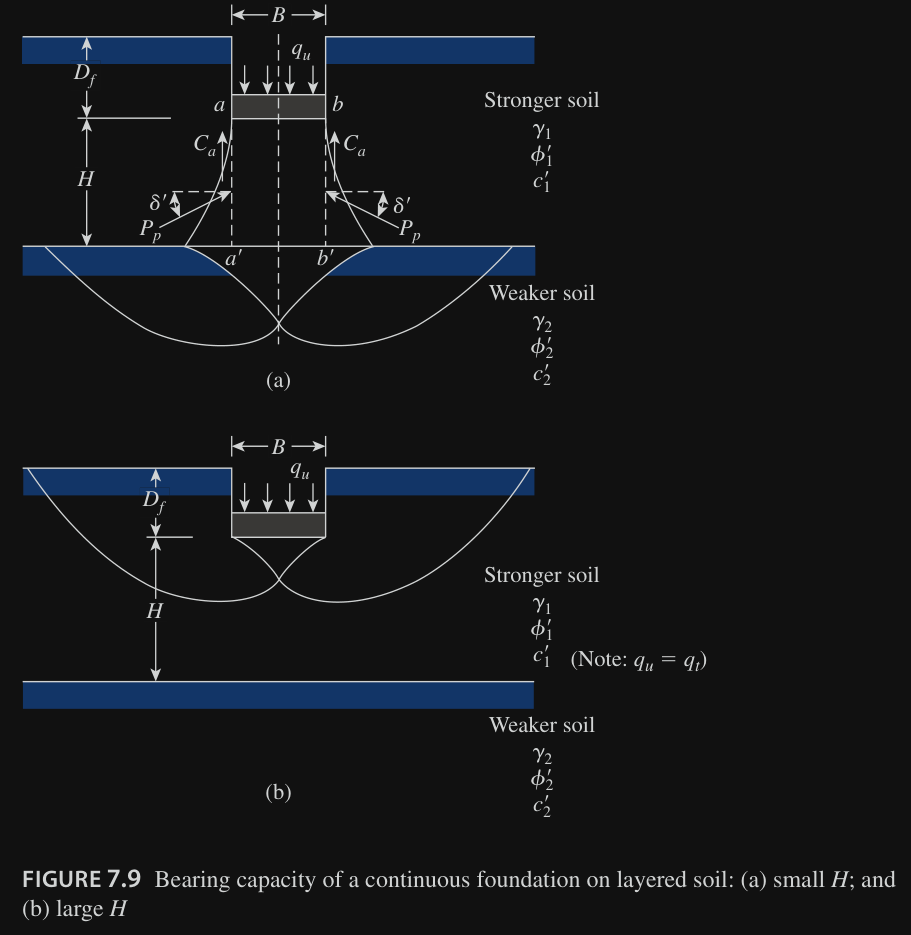

In [77]:
Case_1=False # Suelo fuerte sobre debil
Case_2=True # Suelo Debil sobre Fuerte
# Propiedades de la Cimentacion
B=1.22
L=1.83
Df=0.91
H=0.61
beta=0

# Propiedades del Suelo

# Suelo 1
gamma_1=17.29
phi_1=0
c_1=57.5

# Suelo 2
gamma_2=19.65
phi_2=0
cu_2=119.79

if Case_1:
    print ('q2/q1='+str(round(5.14*cu_2/(1/2*gamma_1*B*Ny_1),3)))
elif Case_2:
    cu_1=c_1
    print ('q2/q1='+str(round(cu_2/cu_1,3)))

q2/q1=2.083


In [26]:
ks=2.5 # De la grafica que se muestr arriba

In [32]:
q_u = (1+0.2*B/L)*5.14*cu_2+gamma_1*H**2*(1+B/L)*(1+2*Df/H)*ks*tan(phi_1*pi/180)/B+gamma_1*Df
print ('q_u='+str(round(q_u, 2)))

q_u=282.58


In [68]:
# Factores de Forma
Fcs=1+B/L*Nq/Nc
Fqs=1+B/L*tan(phi*pi/180)
Fys=1-0.4*B/L
print ('Fcs='+str(round(Fcs,2)), 'Fqs='+str(round(Fqs,2)), 'Fys='+str(round(Fys,2)))

B=2 # Longitud Original

# Factores de profundidad
if Df/B<1:
    if phi==0:
        Fcd=1+0.4*Df/B
        Fqd=1
        Fyd=1
        print ('Fcd='+str(round(Fcd,2)), 'Fqd='+str(round(Fqd,2)), 'Fyd='+str(round(Fyd,2)))
    elif phi>0:
        Fqd=1+2*tan(phi*pi/180)*(1-sin(phi*pi/180))**2*Df/B
        Fcd=Fqd-(1-Fqd)/(Nc*tan(phi*pi/180))
        Fyd=1
        print ('Fcd='+str(round(Fcd,2)), 'Fqd='+str(round(Fqd,2)), 'Fyd='+str(round(Fyd,2)))
    else:
        print('Error')
else:
    if phi==0:
        Fcd=1+0.4*atan(Df/B)
        Fqd=1
        Fyd=1
        print ('Fcd='+str(round(Fcd,2)), 'Fqd='+str(round(Fqd,2)), 'Fyd='+str(round(Fyd,2)))
    elif phi>0:
        Fqd=1+2*tan(phi*pi/180)*(1-sin(phi*pi/180))**2*atan(Df/B)
        Fcd=Fqd-(1-Fqd)/(Nc*tan(phi*pi/180))
        Fyd=1
        print ('Fcd='+str(round(Fcd,2)), 'Fqd='+str(round(Fqd,2)), 'Fyd='+str(round(Fyd,2)))
    else:
        print('Error')
        
# Factores de inclinacion
Fci=(1-beta/90)**2
Fqi=Fci
Fyi=(1-beta/phi)**2
print ('Fci='+str(round(Fci,2)), 'Fqi='+str(round(Fqi,2)), 'Fyi='+str(round(Fyi,2)))

Fcs=1.13 Fqs=1 Fys=0.73
Fcd=1.18 Fqd=1 Fyd=1


TypeError: unsupported operand type(s) for /: 'FunctionClass' and 'int'

In [35]:
Fqs_1=1
Fys_1=1

In [55]:
q_t=gamma_1*Df*Nq_1*Fqs_1+1/2*gamma_1*B*Ny_1*Fys_1
print ('q_t='+str(round(q_t, 2)))

q_t=2164.05


*Suelo Debil sobre Fuerte*

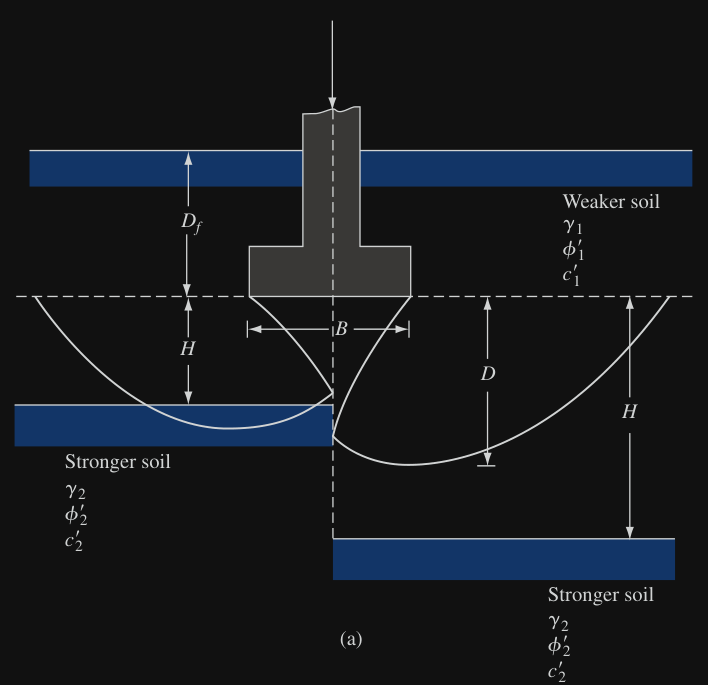

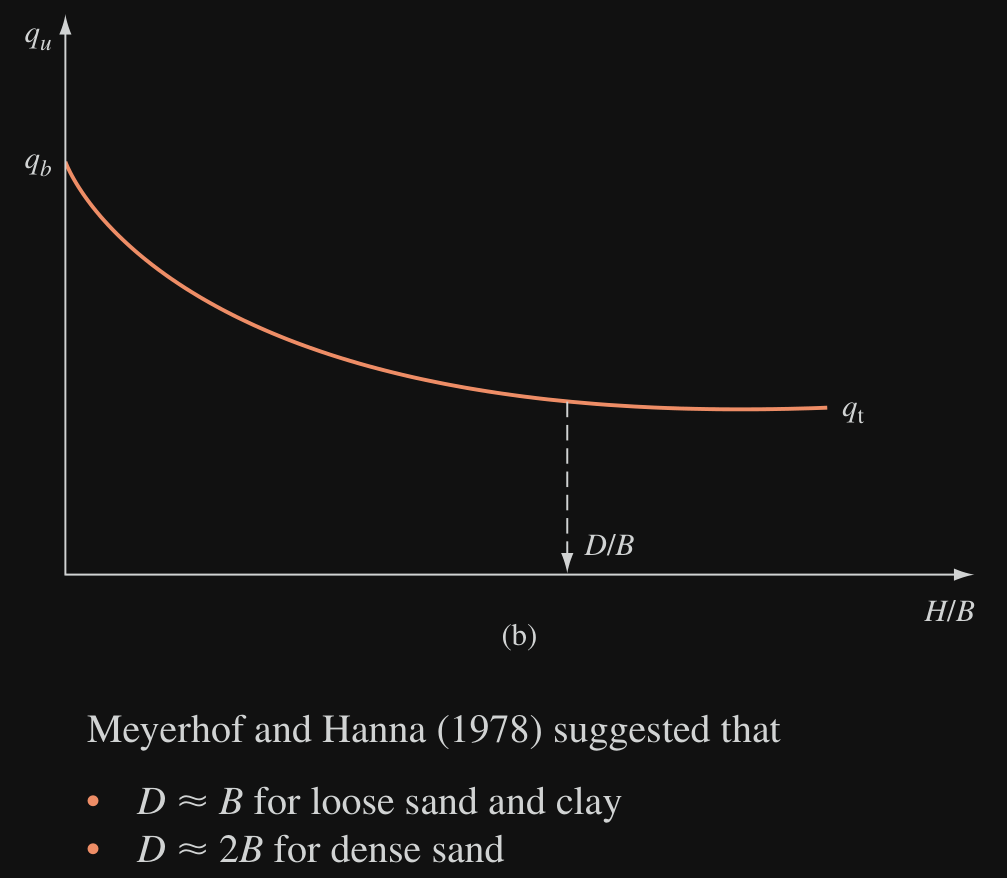

In [80]:
# If phi_1=0 and phi_2=0 utilizamos la siguiente expresion:
# q_t=c1*Nc_1*Fcs_1+gamma_1*Df*Nq_1*Fqs_1+1/2*gamma_1*B*Ny_1*Fys_1
Nc=5.14
q_t = (1+0.2*B/L)*Nc*c_1+gamma_1*Df
print ('q_t='+str(round(q_t, 2)))

q_b = (1+0.2*B/L)*Nc*cu_2+gamma_2*Df
print ('q_b='+str(round(q_b, 2)))

D=B # Aproximadamente
q_u=q_t+(q_b-q_t)*(H/D)**2
print ('q_u='+str(round(q_u, 2)))

q_t=350.69
q_b=715.7
q_u=441.94
